In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable
import scipy
import numba

In [39]:
@np.vectorize
# @numba.jit
def NumericalInt(f: Callable[[float], float], x:float , h: float = 0.01, order: float = 2, name: str = 'Gauss'):
    if name == 'Gauss':
        if order == 2:
            x1 = (2 * x + h)/2 - h/(2 * np.sqrt(3))
            x2 = (2 * x + h)/2 + h/(2 * np.sqrt(3))
            res = (h / 2)*(f(x1) + f(x2))
            return res
        elif order == 3:  
            x1 = x * (1 + np.sqrt(3/5)) / 2 + (x + h) * (1 - np.sqrt(3 / 5)) / 2
            x2 = (2 * x + h) / 2
            x3 = x * (1 - np.sqrt(3 / 5)) / 2 + (x + h) * (1 + np.sqrt(3 / 5)) / 2
            res = (h / 2) * ((5 / 9) * f(x1) + (8 / 9) * f(x2) + (5 / 9) * f(x3))
            return res       
    if name == 'Simpson':
        res = (h / 6) * (f(x) + 4 * f(x + h / 2) + f(x + h))
        return res
    if name == 'Square':
        res = f(x + h / 2) * h
        return res
    if name == 'Trapeziod':
        res = (h / 2) * (f(x) + f(x + h))
        return res
                  
# @numba.jit 
@np.vectorize
def NumericalIntegral(f: Callable[[float], float], a:float, b: float, h: float = 0.01, order: float = 2, name: str = 'Simpson'):
    x = a
    res = 0
    while x<=b:
        if (h>=0.1):
            if x+h>=b:
                return res
        res+= NumericalInt(f, x, h, order, name)
        x+=h
    return res

@np.vectorize
def runge(f: Callable[[float], float], a:float, b: float, h: float = 0.01, order: float = 2, name = 'Simpson'):
    calc_sol1 = NumericalIntegral(f, a, b, h, order, name)
    calc_sol2 = NumericalIntegral(f, a, b, h/2, order, name)
    if name == 'Square':
        res = calc_sol2 + (calc_sol2 - calc_sol1) / 3
    elif name == 'Simpson':
        res = calc_sol2 + (calc_sol2 - calc_sol1) / 15
    return res
        
    
        
        

In [12]:
f = lambda x: (x + 1) * np.cos(x)


In [27]:
def get_error(f: Callable[[float], float], a:float, b: float, order = 2, rungeB = False, name = 'Square'):
    hlog = []
    deltalog = []
    true_sol = 2 * np.sin(1)
    for s in range(-3, 0, 1):
        h = 10 ** s
        if rungeB == True:
            calc_sol = runge(f, a, b, h, order, name = name)
        else:
            calc_sol = NumericalIntegral(f, a, b, h, order, name)
        true_sol = 2 * np.sin(1)
        delta = abs(calc_sol-true_sol)
        deltalog.append(delta)
        hlog.append(h)
        
    return hlog, deltalog

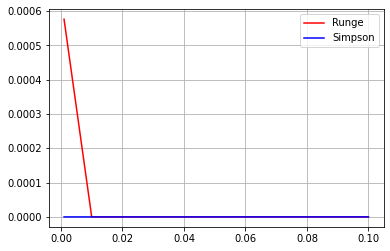

<Figure size 36000x36000 with 0 Axes>

In [40]:
hlogSimpRun, deltalogSimpRun = get_error(f, a = -1, b = 1, rungeB = True, name = "Simpson")
hlogSimp, deltalogSimp = get_error(f, a = -1, b = 1, rungeB = False, name = "Simpson")

plt.plot(hlogSimpRun, deltalogSimpRun, color='red', label='Runge')
plt.plot(hlogSimpRun, deltalogSimp, color='blue', label='Simpson')
plt.legend()
plt.grid()
plt.figure(figsize=(500, 500))
plt.show()

# plt.plot(X, abs(calc_sol - true_sol), color='red', label='разность')
# plt.legend()
# plt.grid()
# plt.figure(figsize=(500, 500))
# plt.show()

In [ ]:
hlogSquareRun, deltalogSquareRun = get_error(f, a = -1, b = 1, rungeB = True, name = "Square")
hlogSquare, deltalogSquare = get_error(f, a = -1, b = 1, rungeB = False, name = "Square")

plt.plot(hlogSquareRun, deltalogSquareRun, color='red', label='Runge')
plt.plot(hlogSquareRun, deltalogSquare, color='blue', label='Square')
plt.legend()
plt.grid()
plt.figure(figsize=(500, 500))
plt.show()

In [ ]:
hlogSquareRun, deltalogSquareRun = get_error(f, a = -1, b = 1, name = "rungeSquare")
hlogSquare, deltalogSquare = get_error(f, a = -1, b = 1, name = "Square")

plt.plot(hlogSquareRun, deltalogSquareRun, color='red', label='Runge')
plt.plot(hlogSquareRun, deltalogSquare, color='blue', label='Square')
plt.legend()
plt.grid()
plt.figure(figsize=(500, 500))
plt.show()

# plt.plot(X, abs(calc_sol - true_sol), color='red', label='разность')
# plt.legend()
# plt.grid()
# plt.figure(figsize=(500, 500))
# plt.show()

In [ ]:
tangensRunge = (deltalogSimpRun[4] - deltalogSimpRun[3]) / (hlogSimp[4] - hlogSimp[3])
tangens = (deltalogSimp[4] - deltalogSimp[3]) / (hlogSimp[4] - hlogSimp[3])
tangensRunge, tangens

In [ ]:
len(deltalogSimp)

In [ ]:
for x in hlogSimp:
    print(x)

In [ ]:
# for x in deltalogSimpRun:
#     print("Runge = ",x)
# #     print("Simpson = ",y)
# print("\n")
# for x in deltalogSimp:
#     print("Simpson = ",x)

In [15]:
true_sol = 2 * np.sin(1)

In [16]:
true_sol

1.682941969615793

In [23]:
calc_sol = NumericalIntegral(f, a= -1, b = 1, h = 0.1 , order = 2, name ="Simpson")

In [24]:
calc_sol

array(1.68294203)

In [36]:
calc_sol = NumericalIntegral(f, a= -1, b = 1, h = 0.01 , order = 2, name ="Simpson")
calc_sol

array(1.67207925)